https://nextjournal.com/SebastianM-C/a-fresh-approach-to-n-body-problems

https://diffeq.sciml.ai/latest/solvers/dynamical_solve/

In [1]:
import numpy as np

In [2]:
class Body:
    def __init__(self, mass, pos, vel):
        self.__mass = mass
        self.__pos = np.array(pos)
        self.__vel = np.array(vel)
    
    def __repr__(self):
        return f"Body with mass {self.__mass}, position {self.__pos}, and velocity {self.__vel}" 
    
    @property
    def mass(self):
        return self.__mass
    
    @mass.setter
    def mass(self, val):
        self.__mass = val

    
    @property
    def pos(self):
        return self.__pos
    
    @pos.setter
    def pos(self, val):
        self.__pos = val

    @property
    def vel(self):
        return self.__vel
    
    @vel.setter
    def vel(self, val):
        self.__vel = val
        
    def acceleration(self, list_of_bodies):
        """
        pass a list of bodies
        """
        return np.sum([body.mass/np.linalg.norm(body.pos-self.pos)**3 * (body.pos-self.pos) for body in list_of_bodies], axis=0)

In [3]:
Sun = Body(99, [0,0], [0,0])

In [4]:
Jupiter = Body(1, [1,0], [0,10])

In [5]:
(Sun.pos*Sun.mass + Jupiter.pos*Jupiter.mass)/(Sun.mass + Jupiter.mass)

array([0.01, 0.  ])

In [6]:
Sun.vel * Sun.mass + Jupiter.vel * Jupiter.mass

array([ 0, 10])

In [7]:
def euler(pos, vel, acc, h):
    return pos + vel*h, vel + acc*h

In [25]:
spos = [Sun.pos]
jpos = [Jupiter.pos]

In [26]:
h = 0.001

In [27]:
for i in range(int(10/h)):
    s_pos, s_vel = euler(Sun.pos, Sun.vel, Sun.acceleration([Jupiter]), h)
    j_pos, j_vel = euler(Jupiter.pos, Jupiter.vel, Jupiter.acceleration([Sun]), h)

    Sun.pos = s_pos
    Sun.vel = s_vel
    Jupiter.pos = j_pos
    Jupiter.vel = j_vel
    spos.append(Sun.pos)
    jpos.append(Jupiter.pos)

In [28]:
spos = np.array(spos)
jpos = np.array(jpos)

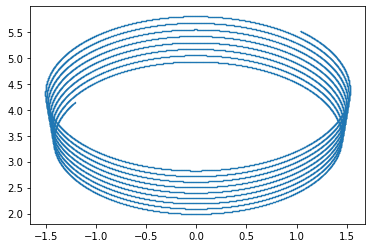

In [30]:
plt.scatter(*jpos.T, s=0.01)

In [29]:
(Sun.pos*Sun.mass + Jupiter.pos*Jupiter.mass)/(Sun.mass + Jupiter.mass)

array([0.01   , 4.39616])

In [68]:
(Sun.vel*Sun.mass + Jupiter.vel*Jupiter.mass)/(Sun.mass + Jupiter.mass)

array([5.67866322e-17, 9.99000999e-04])